# Pandas and Datetime

Pandas comes from Panel Datasets (table like).

Pandas offer easy tools to wrangle, clean, data in table form, plot and perform statistical operations on columns/rows etc.

In [1]:
%config Completer.use_jedi = False 
#This command gives auto-completion option enabled for the jupyter labs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',255)
#pd.get_option('display.max_columns')
import warnings
warnings.filterwarnings("ignore") #Hides futures warnings

So moving from numpy to pandas - using pandas to represent arrays in a table format: 

In [4]:
pd.DataFrame(np.random.randn(2, 4))

,0,1,2,3
0,2.173704,-1.01210,1.210358,1.407559
1,0.332258,0.29554,-1.614979,-0.216856


In [5]:
pd.DataFrame(np.random.randn(10,3)) #try a 600 x 3 matrix of numpy array with standard normal distribution 

,0,1,2
0,-0.075524,1.059573,1.236992
1,-0.910639,1.465369,2.102948
2,1.040414,-1.354249,-0.892211
3,0.403215,0.558722,-0.350652
4,-0.618368,0.749246,-0.646394
5,0.552206,0.455369,0.261997
6,0.538747,1.769234,-1.168879
7,-1.059345,-2.731435,1.168385
8,-1.465066,1.328930,-0.578955
9,-0.009024,-0.414527,0.469774


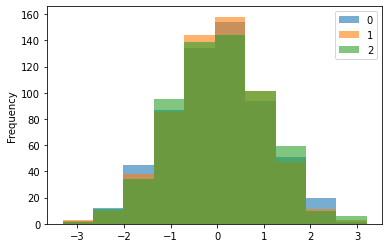

In [6]:
# Standard normal distribution -- creates 3 columns
pd.DataFrame(np.random.randn(600,3)).plot.hist(alpha = 0.6);
#More about plotting in the next notebook including matplotlib and seaborn

OROR### Reading files such as excel/csv: 

pd.read_... has several file type options such as json, csv, json, clipboard (copied table), pickle file, etc.

One of the sample datasets we will use here is the famous Titanic dataset (Source: https://www.kaggle.com/datasets/shuofxz/titanic-machine-learning-from-disaster?select=train.csv).

You may also use Census of India 2011 dataset (Source: https://www.kaggle.com/datasets/danofer/india-census?select=india-districts-census-2011.csv) -- Also avaliable in the folder shared - or you may download the dataset from the link.

In [7]:
df = pd.read_csv('./data/titanic/train.csv')
#df = pd.read_csv('./india-districts-census-2011.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.describe()  # To see even the categorical variable summary use: (include='all')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info() #note that object here is string type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.shape #800 rows and 12 columns 

(891, 12)

In [14]:
df.isna().sum() #Age and Cabin have a large number of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.drop(['Age','Cabin'], axis=1, inplace=True) #dropping the two columns - axis=1 is column

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [17]:
df.dropna(axis=0, inplace=True) #deleting the two rows with missing info in the Embarked column

In [18]:
df.shape, df.duplicated().sum() #checks if any rows are duplicates
#2 rows and 2 columns deleted

((889, 10), 0)

In [19]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [20]:
df.groupby(['Sex'])['Survived'].agg(['mean','sum','count'])

,mean,sum,count
Sex,,,
female,0.740385,231,312
male,0.188908,109,577


In [21]:
df.groupby(['Embarked','Pclass'])['Fare'].sum()

Embarked  Pclass
C         1         8901.0750
          2          431.0917
          3          740.1295
Q         1          180.0000
          2           37.0500
          3          805.2043
S         1         8936.3375
          2         3333.7000
          3         5169.3613
Name: Fare, dtype: float64

# Time Series

#### Part 1

We will use a dataset with time series: Temperature dataset for Rio (Source: https://www.kaggle.com/datasets/volpatto/temperature-timeseries-for-some-brazilian-cities?select=station_rio.csv)

In [22]:
df = pd.read_csv('./data/station_rio.csv')

In [23]:
df.head() #the data is wide format 

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,27.45,24.87,21.98,22.33,24.16
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54,26.56,24.42,21.24,23.41,23.91
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53,25.58,23.54,21.05,23.05,23.31
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56,26.74,24.18,20.82,22.58,23.58
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,27.07,24.48,22.50,23.61,24.42


In [24]:
df = df.melt(id_vars=['YEAR','D-J-F','M-A-M','J-J-A','S-O-N','metANN'], 
        value_vars=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], 
        var_name='Months', value_name='Temperature')

In [25]:
df.head()

,YEAR,D-J-F,M-A-M,J-J-A,S-O-N,metANN,Months,Temperature
0,1973,27.45,24.87,21.98,22.33,24.16,JAN,27.73
1,1974,26.56,24.42,21.24,23.41,23.91,JAN,26.68
2,1975,25.58,23.54,21.05,23.05,23.31,JAN,25.27
3,1976,26.74,24.18,20.82,22.58,23.58,JAN,27.48
4,1977,27.07,24.48,22.50,23.61,24.42,JAN,27.13


In [26]:
df.dtypes

YEAR             int64
D-J-F          float64
M-A-M          float64
J-J-A          float64
S-O-N          float64
metANN         float64
Months          object
Temperature    float64
dtype: object

In [27]:
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

In [28]:
df.dtypes

YEAR           datetime64[ns]
D-J-F                 float64
M-A-M                 float64
J-J-A                 float64
S-O-N                 float64
metANN                float64
Months                 object
Temperature           float64
dtype: object

In [29]:
df.groupby(['Months'])['Temperature'].mean() #Not in order - so we need to make it categorical 

Months
APR     87.341277
AUG    105.158298
DEC    129.836170
FEB    151.711064
JAN    110.087021
JUL    104.484255
JUN     84.027234
MAR     88.692128
MAY    105.961702
NOV    107.822553
OCT     86.071064
SEP    105.589362
Name: Temperature, dtype: float64

<AxesSubplot:xlabel='Months'>

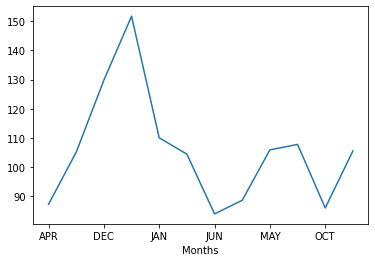

In [30]:
df.groupby(['Months'])['Temperature'].mean().plot()

In [31]:
monthscat = ['JAN','FEB','MAR','APR','MAY','JUN','JUL', 'AUG','SEP',  'OCT','NOV','DEC']
df['Months'] = pd.Categorical(df['Months'], categories=monthscat, ordered=True)
df.Months.dtypes

CategoricalDtype(categories=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
                  'SEP', 'OCT', 'NOV', 'DEC'],
, ordered=True)

In [32]:
df.groupby(['Months'])['Temperature'].mean() #Now it is in order

Months
JAN    110.087021
FEB    151.711064
MAR     88.692128
APR     87.341277
MAY    105.961702
JUN     84.027234
JUL    104.484255
AUG    105.158298
SEP    105.589362
OCT     86.071064
NOV    107.822553
DEC    129.836170
Name: Temperature, dtype: float64

<AxesSubplot:xlabel='Months'>

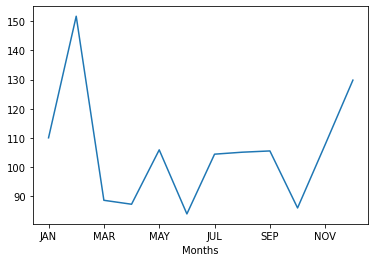

In [33]:
df.groupby(['Months'])['Temperature'].mean().plot() #This graph makes sense

In [34]:
df.dtypes, df.shape, df.Months.dtype

(YEAR           datetime64[ns]
 D-J-F                 float64
 M-A-M                 float64
 J-J-A                 float64
 S-O-N                 float64
 metANN                float64
 Months               category
 Temperature           float64
 dtype: object,
 (564, 8),
 CategoricalDtype(categories=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
                   'SEP', 'OCT', 'NOV', 'DEC'],
 , ordered=True))

In [35]:
df.set_index('YEAR').resample('10Y').mean()

,D-J-F,M-A-M,J-J-A,S-O-N,metANN,Temperature
YEAR,,,,,,
1973-12-31,27.450000,24.870000,21.980,22.330,24.160,24.089167
1983-12-31,26.342000,24.160000,21.345,23.316,23.792,23.791333
1993-12-31,124.135000,122.428000,216.892,218.522,219.237,186.703167
2003-12-31,124.582000,122.536000,119.510,121.335,122.000,130.094167
2013-12-31,221.585000,122.203000,119.435,23.905,121.846,113.695417
2023-12-31,28.121667,25.716667,22.220,24.760,25.205,65.772222


# Time series

### Part 2

Let's look at a little more complicated dataset of Climate data. (Source: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data?select=DailyDelhiClimateTest.csv)

In [36]:
ctrain = pd.read_csv('./data/climate/DailyDelhiClimateTrain.csv', parse_dates=['date'])
ctest = pd.read_csv('./data/climate/DailyDelhiClimateTest.csv',parse_dates=['date'])

In [37]:
ctrain.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [38]:
ctest.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [39]:
df = pd.concat([ctrain, ctest], axis=0,ignore_index=True)
#See also pd.merge - with left, right, inner, outer joins etc. 

In [40]:
df.shape, ctrain.shape, ctest.shape

((1576, 5), (1462, 5), (114, 5))

### Resampling datetime 

See also asfreq() in pandas for resampling

In [41]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [42]:
df.set_index('date', inplace=True) #set datetime as index to resample

In [43]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


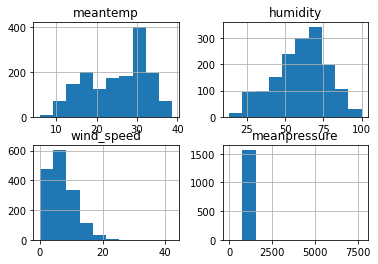

In [44]:
df.hist();

In [45]:
#df.loc[:,['meantemp','humidity']]

<AxesSubplot:xlabel='date'>

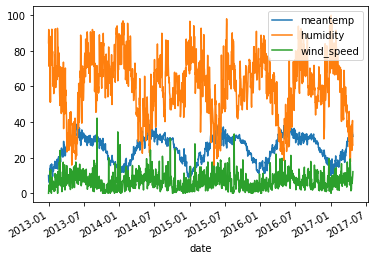

In [46]:
df.iloc[:,0:-1].plot() #Also see .loc which takes row/column names unlike .iloc which takes row/column numbers

<AxesSubplot:xlabel='date'>

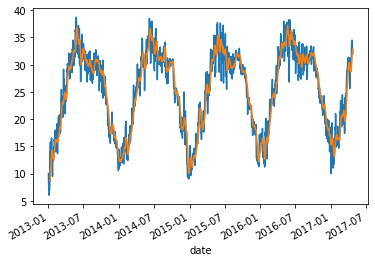

In [47]:
df.meantemp.plot()
df.meantemp.rolling(window=10).mean().plot() #moving average (rolling) for 10 days

<AxesSubplot:xlabel='date'>

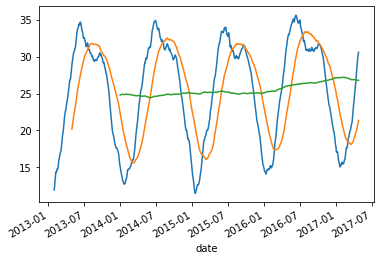

In [48]:
df.meantemp.rolling(window=30).mean().plot()
df.meantemp.rolling(window=120).mean().plot()
df.meantemp.rolling(window=365).mean().plot()
#Moving averages for 1 month, 4 months and yearly averages (rolling)

<AxesSubplot:xlabel='date'>

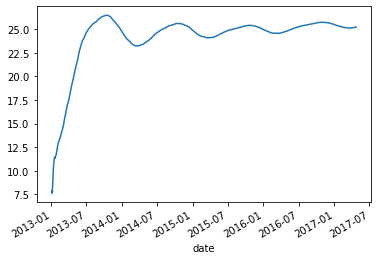

In [49]:
df.meantemp.expanding(min_periods=5).mean().plot() 

<AxesSubplot:xlabel='date'>

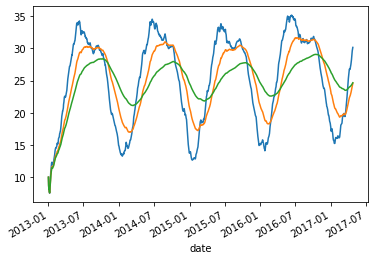

In [50]:
df.meantemp.ewm(span=30).mean().plot() #exponential weighted moving average
df.meantemp.ewm(span=120).mean().plot() 
df.meantemp.ewm(span=365).mean().plot() 